# Loading image data and cutting down size

In [1]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

2024-04-22 09:29:25.831879: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 09:29:26.114110: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 09:29:26.114149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 09:29:26.176691: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-22 09:29:26.312293: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 09:29:26.314122: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
!ls reptile_amphibian_pics

amphibian  reptile


In [14]:
#import os

#base_dir = "/home/emily4664/DataProblems/computer vision project/reptile_amphibian_pics"

#num_skipped = 0
#for folder_name in ("Chameleon", "Frog", "Iguana", "Salamander", "Toad",
#                    "Crocodile_Alligator", "Gecko", "Lizard", "Snake", "Turtle_Tortoise"):
#    max_images = 100
#    folder_path = os.path.join(base_dir, folder_name)
#    for image_i, fname in enumerate(os.listdir(folder_path)):
#        fpath = os.path.join(folder_path, fname)
#        try:
#            with open(fpath, "rb") as fobj:
#                is_jfif = b"JFIF" in fobj.peek(10)
#        except IOError:
#            is_jfif = False

#        if image_i > max_images or not is_jfif:
#            num_skipped += 1
#            # Delete corrupted image
#            os.remove(fpath)

#print(f"Deleted {num_skipped} images.")


Deleted 5042 images.


In [3]:
#image_size = (180, 180)
image_size = (224, 224)

batch_size = 10

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "reptile_amphibian_pics",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1003 files belonging to 2 classes.
Using 803 files for training.
Using 200 files for validation.


2024-04-22 09:29:38.722787: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 09:29:38.723117: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# 2 classes found --> Reptile (0) or Amphibian (1)

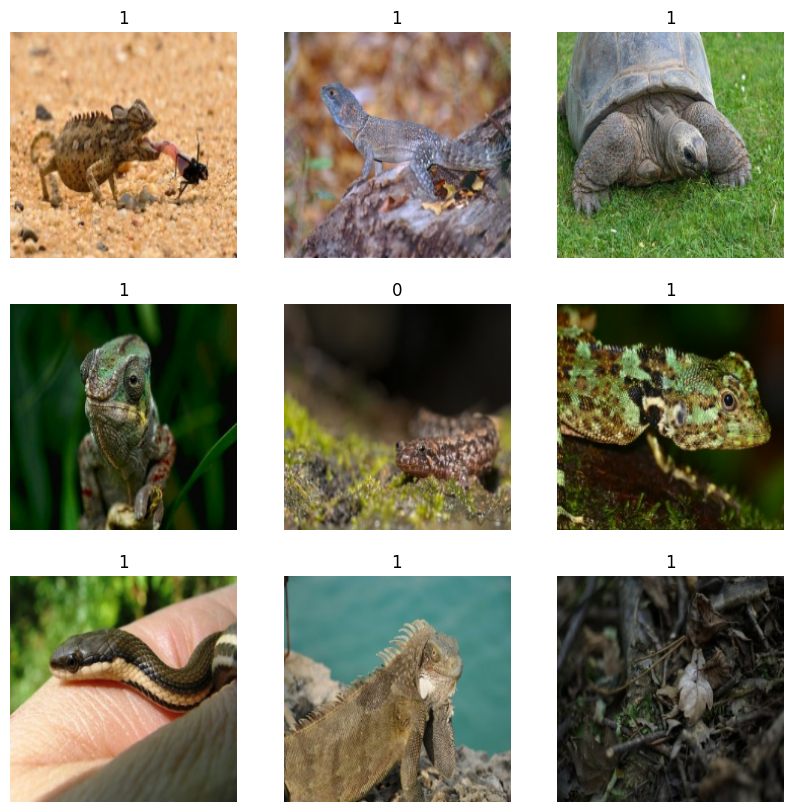

In [4]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

A lil bit of a class imbalance, 7 files for reptiles and 3 for amphibians.